In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
%cd /content/drive/MyDrive/Vispol_classify

/content/drive/MyDrive/Vispol_classify


In [ ]:
doc(search_images_ddg)

In [ ]:
pollutant_labels = [
    "street litter",
    "garbage can",
    "electric pole",
    "billboard",
    "graffiti",
    "smog",
    "broken roads",
    "antennas",
    "construction sites"
]
len(pollutant_labels)



10

In [ ]:
images = search_images_ddg(pollutant_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://www.hartecast.com/wp-content/uploads/2019/01/HC2055-2.jpg'

In [ ]:
doc(download_url)


In [ ]:
dest = "street litter.jpg"
download_url(images[0], dest, show_progress=False)

Path('street litter.jpg')

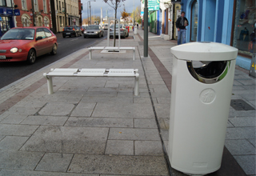

In [ ]:
image = Image.open(dest)
image.to_thumb(256, 256)

In [ ]:
data_path = "data"
if not os.path.exists(data_path): 
  os.mkdir(data_path)

for cap_type in pollutant_labels:

  dest = f"{data_path}/{cap_type}"
  if not os.path.exists(dest): 
    os.mkdir(dest)

  try:
    cap_image_urls = search_images_ddg(cap_type)
    download_images(dest, urls = cap_image_urls)
    
  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#1900) [Path('data/street litter/478ffd21-92f3-4438-aad5-c40c81db458f.jpg'),Path('data/street litter/6b7928cf-5e14-4d3d-b55f-3513820739e0.jpg'),Path('data/street litter/27447de3-d74a-4ed7-a811-ade8a0ff07d4.jpg'),Path('data/street litter/7a8fbe64-ef82-4269-ae13-17fb1e8e6b34.jpg'),Path('data/street litter/8cb83a60-32c1-4d81-9495-7f1ce83b26fa.jpg'),Path('data/street litter/4e1494a8-f6ce-495a-bff3-04cc3b17f703.jpg'),Path('data/street litter/bcd93a62-eab3-4645-b4f6-c54bbc89fa54.png'),Path('data/street litter/a9101092-ce2b-4ff0-b38d-3e4846a2bb64.jpg'),Path('data/street litter/f785b3da-fa00-4768-9a18-6e79a21c75e5.jpg'),Path('data/street litter/a8c70278-ef10-4900-a2ab-b78f5c2cbb1e.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#18) [Path('data/street litter/d0764bbf-a470-4923-9f3b-d6b22f86b309.jpg'),Path('data/graffiti/8e11a6b5-d399-46f8-ab1e-feca27052192.jpg'),Path('data/graffiti/18fcae41-4a39-4eee-82fc-61dc722368ce.jpg'),Path('data/graffiti/ac89912b-033b-483b-b40f-2a5d7948b39d.jpg'),Path('data/graffiti/d93b7735-cc25-48e0-8aa6-1783e8f6bad9.jpg'),Path('data/graffiti/e804f3d4-d4a9-40e3-b818-266dd3a9a0e2.jpg'),Path('data/graffiti/551a9ea5-04ed-4372-b8d6-2d285371641f.jpg'),Path('data/smog/1d94f93b-2641-4fab-ad41-74f4e98fc045.jpg'),Path('data/smog/4a86e89d-c535-489c-a197-beb9c94652d1.jpg'),Path('data/smog/75bc60a4-3aa5-44a5-967b-8f63728af0b8.jpg')...]

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(256))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

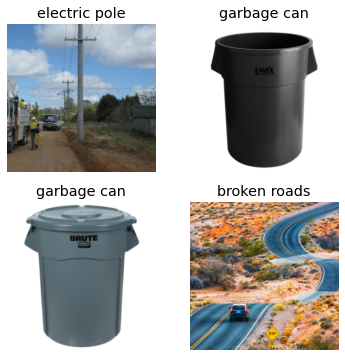

In [ ]:
dls.train.show_batch(max_n=4, nrows=2)

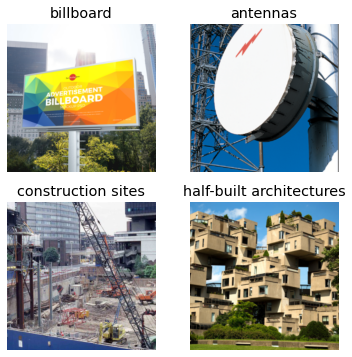

In [ ]:
dls.valid.show_batch(max_n=4, nrows=2)

In [ ]:
doc(aug_transforms)

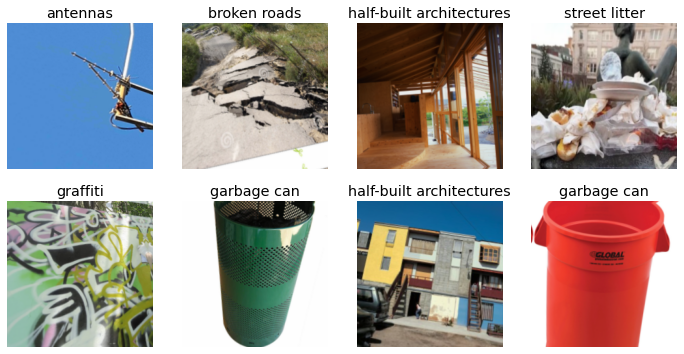

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "cap_dataloader_v0.pkl")